# **Fintech Fraud Detection** #

Deteksi Fraud Menggunakan Linear Regression

## **Import Library** ##

In [1]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine Learning Library 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN

# Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

## **Load The Dataset** ##

In [36]:
train = pd.read_csv('/Users/asyzyni/Documents/Machine Learning/ristek-datathon-2024/train.csv')
loan_activities = pd.read_csv('/Users/asyzyni/Documents/Machine Learning/ristek-datathon-2024/loan_activities.csv')
test = pd.read_csv('/Users/asyzyni/Documents/Machine Learning/ristek-datathon-2024/test.csv')
non_borrower = pd.read_csv('/Users/asyzyni/Documents/Machine Learning/ristek-datathon-2024/non_borrower_user.csv')
submission = pd.read_csv('/Users/asyzyni/Documents/Machine Learning/ristek-datathon-2024/sample_submission.csv')

## **Data Exploration** ##

### show initial information about all datasets ###

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  857899 non-null  int64  
 1   pc0      857899 non-null  float64
 2   pc1      857899 non-null  float64
 3   pc2      857899 non-null  float64
 4   pc3      857899 non-null  float64
 5   pc4      857899 non-null  float64
 6   pc5      857899 non-null  float64
 7   pc6      857899 non-null  float64
 8   pc7      857899 non-null  float64
 9   pc8      857899 non-null  float64
 10  pc9      857899 non-null  float64
 11  pc10     857899 non-null  float64
 12  pc11     857899 non-null  float64
 13  pc12     857899 non-null  float64
 14  pc13     857899 non-null  float64
 15  pc14     857899 non-null  float64
 16  pc15     857899 non-null  float64
 17  pc16     857899 non-null  float64
 18  label    857899 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 124.4 MB


In [4]:
loan_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300999 entries, 0 to 4300998
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   user_id            int64
 1   reference_contact  int64
 2   loan_type          int64
 3   ts                 int64
dtypes: int64(4)
memory usage: 131.3 MB


In [5]:
non_borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474949 entries, 0 to 2474948
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  int64  
 1   pc0      float64
 2   pc1      float64
 3   pc2      float64
 4   pc3      float64
 5   pc4      float64
 6   pc5      float64
 7   pc6      float64
 8   pc7      float64
 9   pc8      float64
 10  pc9      float64
 11  pc10     float64
 12  pc11     float64
 13  pc12     float64
 14  pc13     float64
 15  pc14     float64
 16  pc15     float64
 17  pc16     float64
dtypes: float64(17), int64(1)
memory usage: 339.9 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367702 entries, 0 to 367701
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  367702 non-null  int64  
 1   pc0      367702 non-null  float64
 2   pc1      367702 non-null  float64
 3   pc2      367702 non-null  float64
 4   pc3      367702 non-null  float64
 5   pc4      367702 non-null  float64
 6   pc5      367702 non-null  float64
 7   pc6      367702 non-null  float64
 8   pc7      367702 non-null  float64
 9   pc8      367702 non-null  float64
 10  pc9      367702 non-null  float64
 11  pc10     367702 non-null  float64
 12  pc11     367702 non-null  float64
 13  pc12     367702 non-null  float64
 14  pc13     367702 non-null  float64
 15  pc14     367702 non-null  float64
 16  pc15     367702 non-null  float64
 17  pc16     367702 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 50.5 MB


### show the first row of each dataset ###

In [7]:
train.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


In [8]:
loan_activities.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [9]:
non_borrower.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1.0,5.0,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
1,1,0.0,8.0,0.63,0.565,0.896825,0.6,2.298,0.21,2.284,0.993908,1.0,0.103175,0.006092,0.053097,1.0,0.007937,0.166667
2,2,-1.0,-1.0,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
3,6,0.0,1.0,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
4,7,1.0,6.0,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000


In [10]:
test.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


In [11]:
# Mencari tau apakah ada '1' pada kolom Label
if (train['label'] == 1).any():
    print("Angka 1 ditemukan di kolom label")
else:
    print("Angka 1 tidak ditemukan di kolom label")

value_counts = train['label'].value_counts()
count_ones = value_counts.get(1, 0)  # get(1, 0) memastikan jika angka 1 tidak ada, maka hasilnya 0
print(f"Jumlah angka 1 di kolom label: {count_ones}")

Angka 1 ditemukan di kolom label
Jumlah angka 1 di kolom label: 10857


In [12]:
# Mencari tau mana saja kah Fraud / yang memiliki angka '1' pada kolom label
fraud_df = train[train['label'] == 1]
fraud_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
252,1080,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
305,1307,1.0,1.0,0.295,0.285,0.966102,0.5,0.346,0.057,0.344,0.994220,0.0,0.033898,0.005780,0.087719,1.00,-1.000000,-1.00,1
481,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,0.990440,1.0,0.071429,0.009560,0.043956,0.75,0.010204,0.25,1
482,2002,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
515,2129,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857668,3699581,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857678,3699636,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857691,3699702,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.00,-1.000000,-1.00,1
857775,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,0.998201,0.0,0.025424,0.001799,0.043478,1.00,-1.000000,-1.00,1


In [13]:
# mencari tau non-fraud
non_fraud_df = train[train['label'] == 0]
non_fraud_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,0.975089,0.0,0.157895,0.024911,0.031250,1.000000,-1.000000,-1.000000,0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,0.989867,4.0,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,0.987799,2.0,0.048499,0.012201,0.058252,0.458333,0.004619,0.083333,0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,0.968408,4.0,0.245783,0.031592,0.060703,0.736842,0.009639,0.210526,0


In [14]:
#  matriks korelasi untuk keseluruhan data
correlation_matrix = train.corr()
print("\nMatriks Korelasi Keseluruhan Data:")
print(correlation_matrix)


Matriks Korelasi Keseluruhan Data:
          user_id       pc0       pc1       pc2       pc3       pc4       pc5  \
user_id  1.000000  0.000850  0.000716  0.000856  0.000786  0.001489  0.001586   
pc0      0.000850  1.000000 -0.047754  0.044008  0.040757  0.006938  0.041811   
pc1      0.000716 -0.047754  1.000000  0.104170  0.090017  0.014897  0.088518   
pc2      0.000856  0.044008  0.104170  1.000000  0.992081  0.589856  0.821341   
pc3      0.000786  0.040757  0.090017  0.992081  1.000000  0.593377  0.827753   
pc4      0.001489  0.006938  0.014897  0.589856  0.593377  1.000000  0.553689   
pc5      0.001586  0.041811  0.088518  0.821341  0.827753  0.553689  1.000000   
pc6      0.001668  0.031917  0.176416  0.756451  0.737096  0.528870  0.677340   
pc7      0.001604  0.003570  0.089969  0.646847  0.632744  0.801627  0.656095   
pc8      0.001685  0.031785  0.174685  0.750203  0.733361  0.529164  0.675626   
pc9      0.001481  0.008916  0.021810  0.593102  0.590079  0.996093  0.55

In [15]:
# matriks korelasi untuk data fraud
fraud_correlation_matrix = fraud_df.corr()
print("\nMatriks Korelasi Data Fraud:")
print(fraud_correlation_matrix)



Matriks Korelasi Data Fraud:
          user_id       pc0       pc1       pc2       pc3       pc4       pc5  \
user_id  1.000000 -0.000593 -0.008586  0.018614  0.019540  0.018630  0.010824   
pc0     -0.000593  1.000000 -0.081673 -0.023561 -0.025159 -0.049949 -0.016146   
pc1     -0.008586 -0.081673  1.000000 -0.029148 -0.031141 -0.050441 -0.011328   
pc2      0.018614 -0.023561 -0.029148  1.000000  0.996970  0.886412  0.831484   
pc3      0.019540 -0.025159 -0.031141  0.996970  1.000000  0.895873  0.833881   
pc4      0.018630 -0.049949 -0.050441  0.886412  0.895873  1.000000  0.732758   
pc5      0.010824 -0.016146 -0.011328  0.831484  0.833881  0.732758  1.000000   
pc6      0.012455 -0.021171 -0.005632  0.905096  0.902766  0.833158  0.774890   
pc7      0.018292 -0.036071 -0.028331  0.873778  0.874489  0.907888  0.817571   
pc8      0.012530 -0.021167 -0.005859  0.902739  0.901761  0.834455  0.774405   
pc9      0.017629 -0.049447 -0.050659  0.888821  0.895721  0.998389  0.733076  

In [16]:
# matriks korelasi untuk non-fraud
non_fraud_correlation_matrix = non_fraud_df.corr()
print("\nMatriks Korelasi Data Non-Fraud:")
print(non_fraud_correlation_matrix)


Matriks Korelasi Data Non-Fraud:
          user_id       pc0       pc1       pc2       pc3       pc4       pc5  \
user_id  1.000000  0.000854  0.000829  0.000836  0.000753  0.001357  0.001589   
pc0      0.000854  1.000000 -0.047446  0.045125  0.041834  0.008372  0.042818   
pc1      0.000829 -0.047446  1.000000  0.106000  0.091694  0.016542  0.090043   
pc2      0.000836  0.045125  0.106000  1.000000  0.992048  0.587854  0.820878   
pc3      0.000753  0.041834  0.091694  0.992048  1.000000  0.591305  0.827309   
pc4      0.001357  0.008372  0.016542  0.587854  0.591305  1.000000  0.551736   
pc5      0.001589  0.042818  0.090043  0.820878  0.827309  0.551736  1.000000   
pc6      0.001697  0.032856  0.178712  0.755391  0.735973  0.527178  0.676357   
pc7      0.001537  0.004647  0.092121  0.644930  0.630697  0.800083  0.654336   
pc8      0.001713  0.032718  0.176959  0.749117  0.732222  0.527464  0.674635   
pc9      0.001367  0.010382  0.023577  0.591051  0.587903  0.996047  0.5506

## **Data Visualization** ##

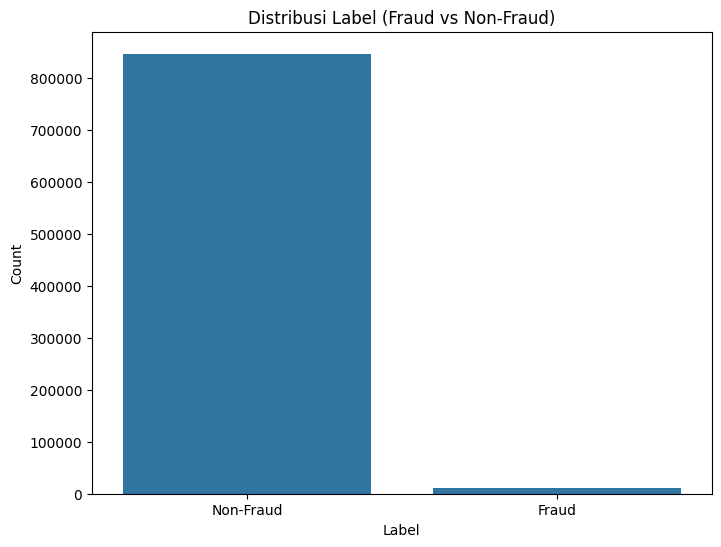

In [17]:
# distribusi label Fraud vs Non-Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train)
plt.title('Distribusi Label (Fraud vs Non-Fraud)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])  # Menentukan label pada sumbu X
plt.show()

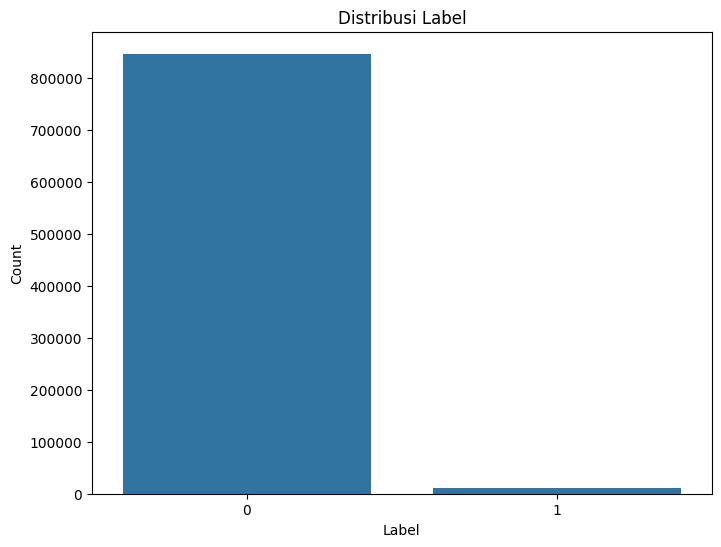

In [18]:
# Distribusi label pada data train
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

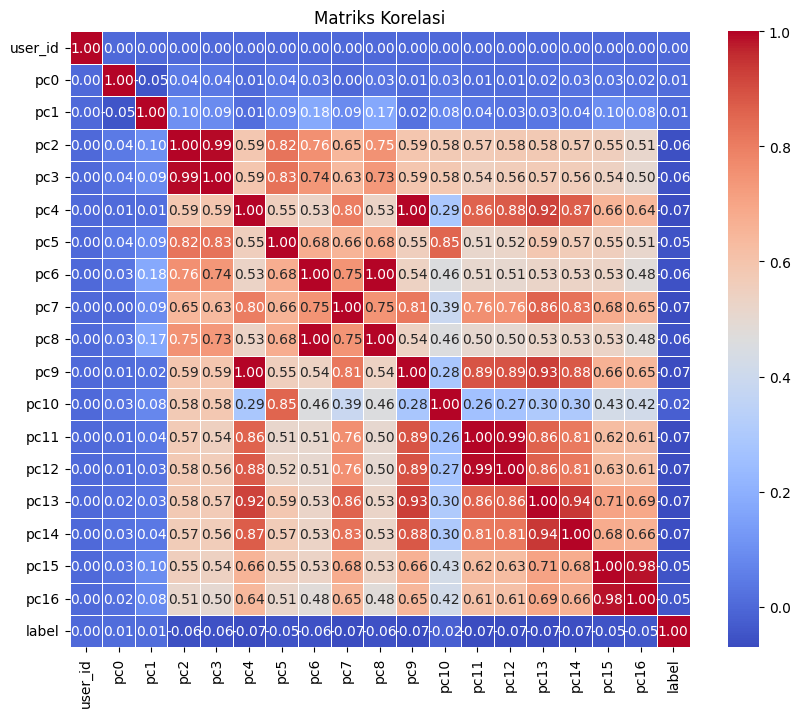

In [19]:
# korelasi antar fitur train
plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

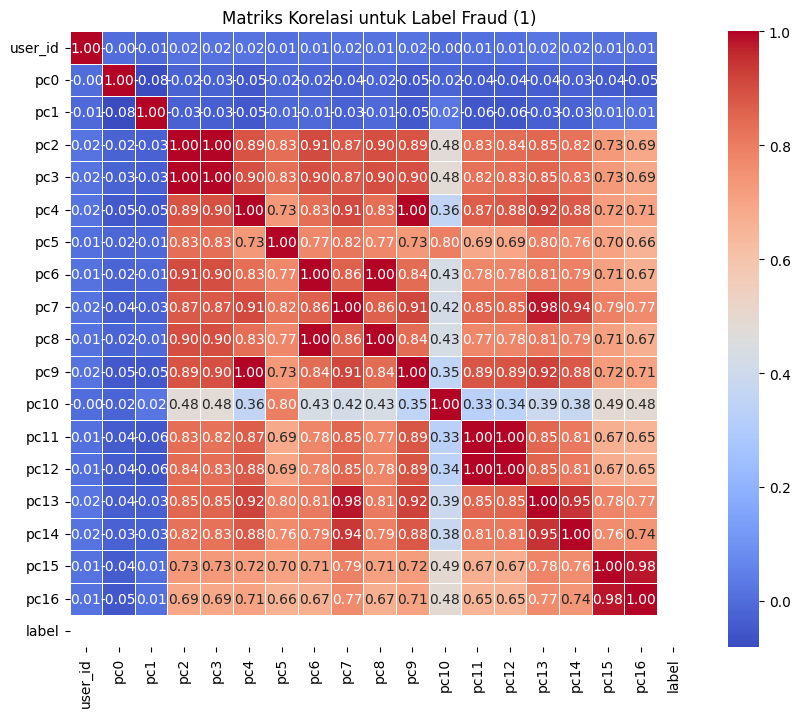

In [20]:
#korelasi antar fitur untuk label = 1 (fraud)
plt.figure(figsize=(10, 8))
fraud_data = train[train['label'] == 1]
correlation_matrix_fraud = fraud_data.corr()
sns.heatmap(correlation_matrix_fraud, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi untuk Label Fraud (1)')
plt.show()

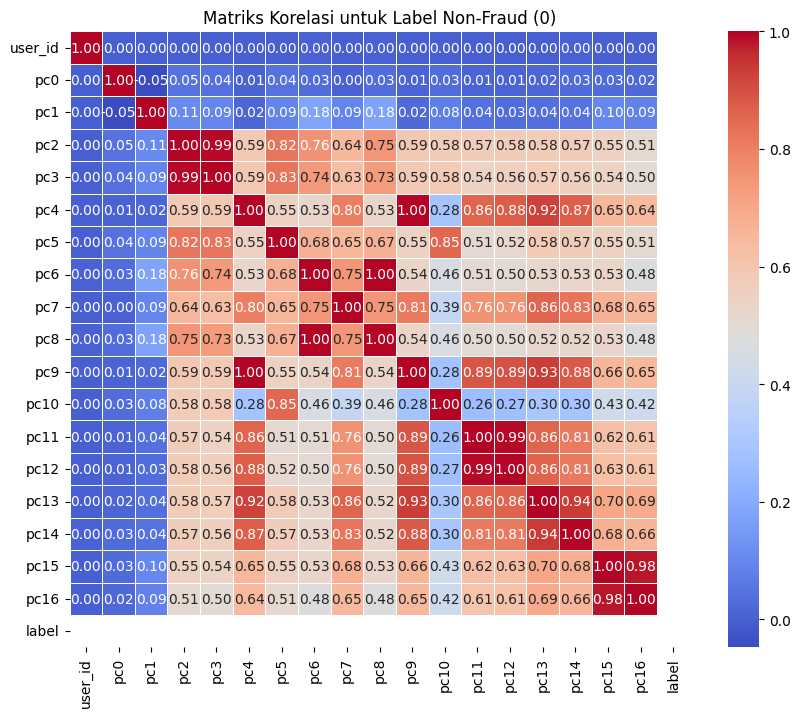

In [21]:
# korelasi antar fitur untuk label = 0 (non-fraud)
plt.figure(figsize=(10, 8))
non_fraud_data = train[train['label'] == 0]
correlation_matrix_non_fraud = non_fraud_data.corr()
sns.heatmap(correlation_matrix_non_fraud, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi untuk Label Non-Fraud (0)')
plt.show()


## **Data Preprocessing** ##

In [22]:
# Memisahkan fitur dan label
X = train.drop(['user_id', 'label'], axis=1)
y = train['label']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan distribusi label pada data latih
print("Distribusi label pada data latih:")
print(y_train.value_counts())

# Menggunakan BorderlineSMOTE untuk menyeimbangkan kelas
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Distribusi label pada data latih:
label
0    677638
1      8681
Name: count, dtype: int64


## **Model Training** ##

In [23]:
# Melatih model Logistic Regression dengan data yang seimbang (BorderlineSMOTE)
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Melakukan prediksi pada set validasi
y_pred_smote = model_smote.predict(X_val)
y_pred_proba_smote = model_smote.predict_proba(X_val)[:, 1]

In [24]:
score = average_precision_score(y_val, y_pred_proba_smote)
print(score)

0.025203572199067006


In [25]:
# Periksa distribusi prediksi pada set validasi

prediction_smote = pd.Series(y_pred_smote).value_counts()
prediction_smote

0    124021
1     47559
Name: count, dtype: int64

## **Model Evaluation** ##

In [40]:
# Prediksi pada data test 
test_predict_smote = model_smote.predict(test.drop(['user_id'], axis=1))


In [41]:
# Periksa Distribusi Prediksi pada data test 
dist_test = pd.Series(test_predict_smote).value_counts()
dist_test

0    266684
1    101018
Name: count, dtype: int64

In [42]:
# Menyimpan prediksi ke dalam file CSV untuk submission
submission_smote = pd.DataFrame({'user_id': test['user_id'], 'label': test_predict_smote})
submission_smote.to_csv('marvellboss.csv', index=False)

## **Pickling Model** ##

In [30]:
import pickle 

# Penyimpanan model yang telah di-fit(train) dalam format ".pkl"
pickle.dump(test_predict_smote, open('model.pkl', 'wb'))